In [1]:
pip install mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.3/26.3 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.8/538.8 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import mlflow
import mlflow.sklearn
import os
import pickle
from google.colab import files
from xgboost import XGBClassifier

In [3]:
df = pd.read_csv("dementia_patients_health_data.csv")
df.head()

,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Prescription,Dosage in mg,Age,...,Smoking_Status,APOE_ε4,Physical_Activity,Depression_Status,Cognitive_Test_Scores,Medication_History,Nutrition_Diet,Sleep_Quality,Chronic_Health_Conditions,Dementia
0,1,0.084974,98,96.230743,36.224852,57.563978,36.421028,NaN,NaN,60,...,Current Smoker,Negative,Sedentary,No,10,No,Low-Carb Diet,Poor,Diabetes,0
1,0,0.016973,78,93.032122,36.183874,56.832335,31.157633,Galantamine,12.0,61,...,Former Smoker,Positive,Moderate Activity,No,1,Yes,Low-Carb Diet,Poor,Heart Disease,1
2,0,0.009000,89,93.566504,37.326321,59.759066,37.640435,NaN,NaN,69,...,Former Smoker,Negative,Moderate Activity,No,8,No,Mediterranean Diet,Poor,Heart Disease,0
3,0,0.086437,60,93.906510,37.030620,58.266471,50.673992,Donepezil,23.0,78,...,Never Smoked,Negative,Mild Activity,Yes,5,Yes,Balanced Diet,Poor,Hypertension,1
4,1,0.150747,67,97.508994,36.062121,67.705027,27.810601,Memantine,20.0,77,...,Never Smoked,Positive,Mild Activity,No,0,Yes,Low-Carb Diet,Good,Diabetes,1


In [ ]:
df

,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Prescription,Dosage in mg,Age,Education_Level,Dominant_Hand,Gender,Family_History,Smoking_Status,APOE_ε4,Physical_Activity,Depression_Status,Cognitive_Test_Scores,Medication_History,Nutrition_Diet,Sleep_Quality,Chronic_Health_Conditions,Dementia
0,1,0.084974,98,96.230743,36.224852,57.563978,36.421028,NaN,NaN,60,Primary School,Left,Female,No,Current Smoker,Negative,Sedentary,No,10,No,Low-Carb Diet,Poor,Diabetes,0
1,0,0.016973,78,93.032122,36.183874,56.832335,31.157633,Galantamine,12.0,61,Secondary School,Right,Male,No,Former Smoker,Positive,Moderate Activity,No,1,Yes,Low-Carb Diet,Poor,Heart Disease,1
2,0,0.009000,89,93.566504,37.326321,59.759066,37.640435,NaN,NaN,69,Primary School,Right,Male,Yes,Former Smoker,Negative,Moderate Activity,No,8,No,Mediterranean Diet,Poor,Heart Disease,0
3,0,0.086437,60,93.906510,37.030620,58.266471,50.673992,Donepezil,23.0,78,Secondary School,Left,Female,Yes,Never Smoked,Negative,Mild Activity,Yes,5,Yes,Balanced Diet,Poor,Hypertension,1
4,1,0.150747,67,97.508994,36.062121,67.705027,27.810601,Memantine,20.0,77,Secondary School,Right,Male,Yes,Never Smoked,Positive,Mild Activity,No,0,Yes,Low-Carb Diet,Good,Diabetes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0.081825,87,93.851963,36.495134,50.380106,42.318663,Donepezil,10.0,88,Diploma/Degree,Left,Male,Yes,Never Smoked,Positive,Mild Activity,No,5,No,Balanced Diet,Poor,Diabetes,1
996,1,0.145249,97,94.522391,36.270804,94.006484,52.812568,NaN,NaN,80,Primary School,Left,Female,No,Never Smoked,Negative,Moderate Activity,No,9,Yes,Low-Carb Diet,Poor,Diabetes,0
997,1,0.073692,65,98.578388,37.065703,80.088613,13.640229,NaN,NaN,67,Primary School,Right,Female,No,Never Smoked,Positive,Sedentary,No,8,Yes,Balanced Diet,Good,Diabetes,0
998,0,0.037347,71,91.298580,37.037202,95.322210,17.445715,Memantine,20.0,62,No School,Left,Male,Yes,Never Smoked,Positive,Sedentary,Yes,2,No,Low-Carb Diet,Good,NaN,1


In [ ]:
df.describe()

,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Dosage in mg,Age,Cognitive_Test_Scores,Dementia
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,485.000000,1000.000000,1000.000000,1000.000000
mean,0.513000,0.098429,79.383000,95.226051,36.761513,74.321326,30.103568,9.213402,74.908000,6.383000,0.485000
std,0.500081,0.058715,12.107556,2.929262,0.431701,14.463765,16.862170,6.493188,9.095068,3.180633,0.500025
min,0.000000,0.000414,60.000000,90.010677,36.002108,50.069731,0.094684,1.500000,60.000000,0.000000,0.000000
25%,0.000000,0.045505,68.000000,92.875017,36.395363,61.387339,16.237371,4.000000,67.000000,4.000000,0.000000
50%,1.000000,0.098235,79.000000,95.390420,36.784319,74.149204,29.577194,8.000000,75.000000,8.000000,0.000000
75%,1.000000,0.151840,90.000000,97.785111,37.126655,87.024034,44.176723,12.000000,83.000000,9.000000,1.000000
max,1.000000,0.199866,100.000000,99.999230,37.496809,99.982722,59.957599,23.000000,90.000000,10.000000,1.000000


In [ ]:
df.isna().sum()

,0
Diabetic,0
AlcoholLevel,0
HeartRate,0
BloodOxygenLevel,0
BodyTemperature,0
Weight,0
MRI_Delay,0
Prescription,515
Dosage in mg,515
Age,0


In [ ]:
df.Prescription.unique()

array([nan, 'Galantamine', 'Donepezil', 'Memantine', 'Rivastigmine'],
      dtype=object)

In [ ]:
df["Prescription"].fillna("None", inplace=True)

In [ ]:
df = df.rename(columns={'Dosage in mg': 'Dosage_in_mg'})

In [ ]:
df.Dosage_in_mg.unique()

array([ nan, 12. , 23. , 20. ,  1.5, 10. ,  3. ,  5. ,  6. ,  8. ,  4. ])

In [ ]:
df["Dosage_in_mg"].fillna(0, inplace=True)

In [ ]:
df.Chronic_Health_Conditions.unique()

array(['Diabetes', 'Heart Disease', 'Hypertension', nan], dtype=object)

In [ ]:
df["Chronic_Health_Conditions"].fillna("None", inplace=True)

In [ ]:
df.isna().sum()

,0
Diabetic,0
AlcoholLevel,0
HeartRate,0
BloodOxygenLevel,0
BodyTemperature,0
Weight,0
MRI_Delay,0
Prescription,0
Dosage_in_mg,0
Age,0


In [ ]:
df.dtypes

,0
Diabetic,int64
AlcoholLevel,float64
HeartRate,int64
BloodOxygenLevel,float64
BodyTemperature,float64
Weight,float64
MRI_Delay,float64
Prescription,object
Dosage in mg,float64
Age,int64


In [ ]:
# Identify numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
print(numeric_cols)

Index(['Diabetic', 'AlcoholLevel', 'HeartRate', 'BloodOxygenLevel',
       'BodyTemperature', 'Weight', 'MRI_Delay', 'Dosage_in_mg', 'Age',
       'Cognitive_Test_Scores', 'Dementia'],
      dtype='object')


In [ ]:
# Identify categorical columns
categotical_cols = df.select_dtypes(include=['object']).columns
print(categotical_cols)

Index(['Prescription', 'Education_Level', 'Dominant_Hand', 'Gender',
       'Family_History', 'Smoking_Status', 'APOE_ε4', 'Physical_Activity',
       'Depression_Status', 'Medication_History', 'Nutrition_Diet',
       'Sleep_Quality', 'Chronic_Health_Conditions'],
      dtype='object')


# **EDA**

The dataset is quite balanced in terms of the gender distribution

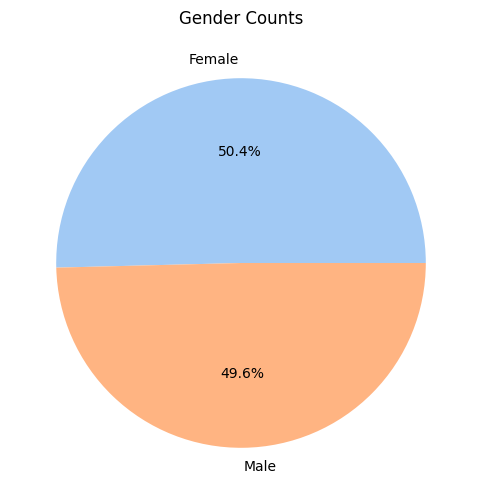

In [ ]:
gender_counts = df['Gender'].value_counts()

colors = sns.color_palette('pastel')[0:5]

plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Gender Counts')
plt.show()

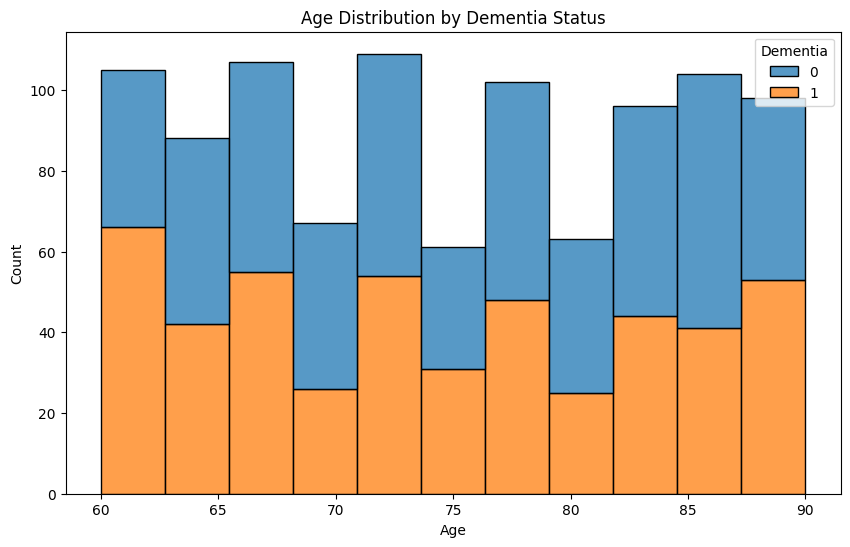

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Dementia', multiple='stack')
plt.title('Age Distribution by Dementia Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


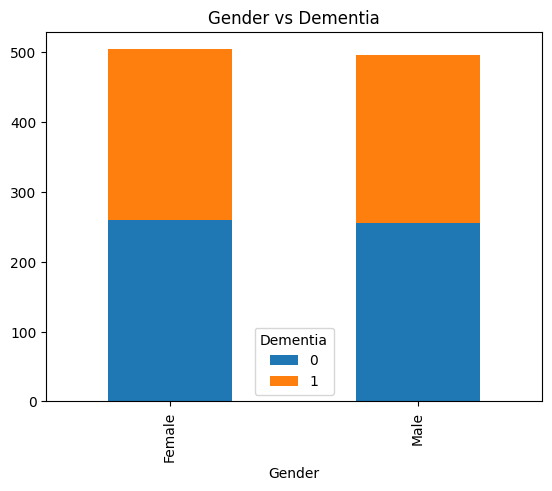

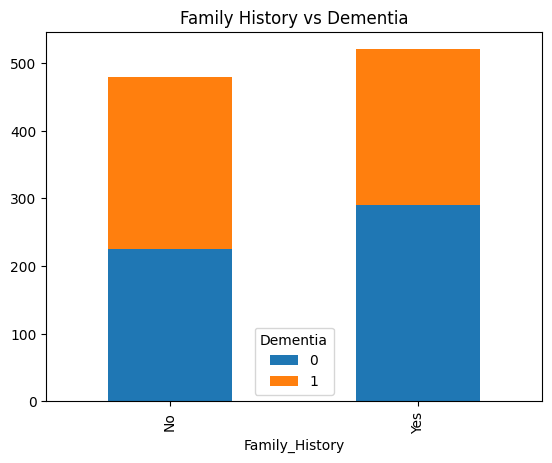

In [ ]:
pd.crosstab(df['Gender'], df['Dementia']).plot(kind='bar', stacked=True)
plt.title('Gender vs Dementia')
plt.show()

pd.crosstab(df['Family_History'], df['Dementia']).plot(kind='bar', stacked=True)
plt.title('Family History vs Dementia')
plt.show()


**Observations from the Heatmap**



1. Cognitive_Test_Scores and Dementia:

    Strong negative correlation (-0.84). Lower cognitive test scores are associated with dementia.


2. Dosage_in_mg and Dementia:

    Moderate positive correlation (0.71). Higher medication dosage is associated with dementia.


3. Cognitive_Test_Scores and Dosage_in_mg:

    Moderate negative correlation (-0.62). Lower cognitive test scores are associated with higher medication dosages.



Other features do not show strong correlations with dementia, indicating they might not be as useful for predicting dementia directly.

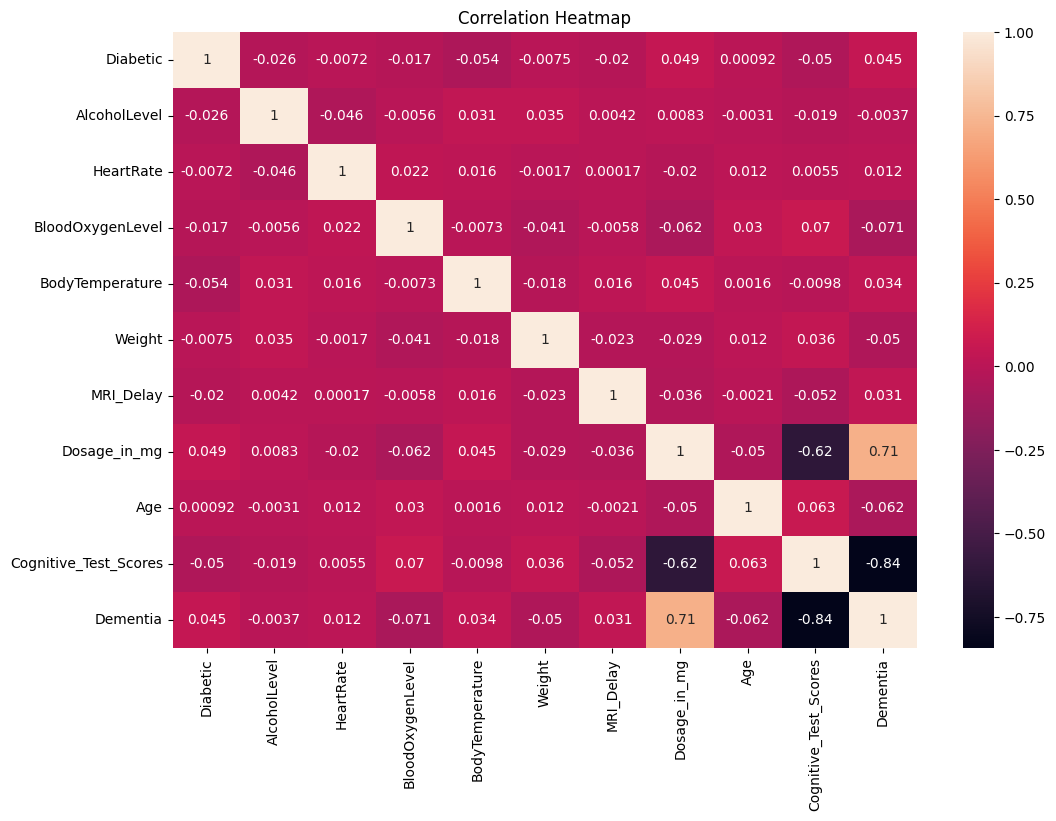

In [ ]:
# Compute the correlation matrix only for numeric columns
corr = df[numeric_cols].corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True)
plt.title('Correlation Heatmap')
plt.show()





---

**Analysing the relationship between cognitive test scores and dementia:**


Based on the histogram, there is a clear separation in cognitive test scores between individuals with and without dementia. Visual inspection suggests that individuals with a cognitive test score below 8 are likely to have dementia.

This observation is further validated by a more precise method using ROC curve analysis. The ROC curve analysis helps identify the optimal threshold by maximizing the true positive rate (sensitivity) while minimizing the false positive rate (1-specificity).

Based on the distribution chart and the ROC curve analysis, we can conclude that the **optimal threshold for the Cognitive Test Score is 8. Individuals scoring below this threshold are more likely to have dementia.**



---



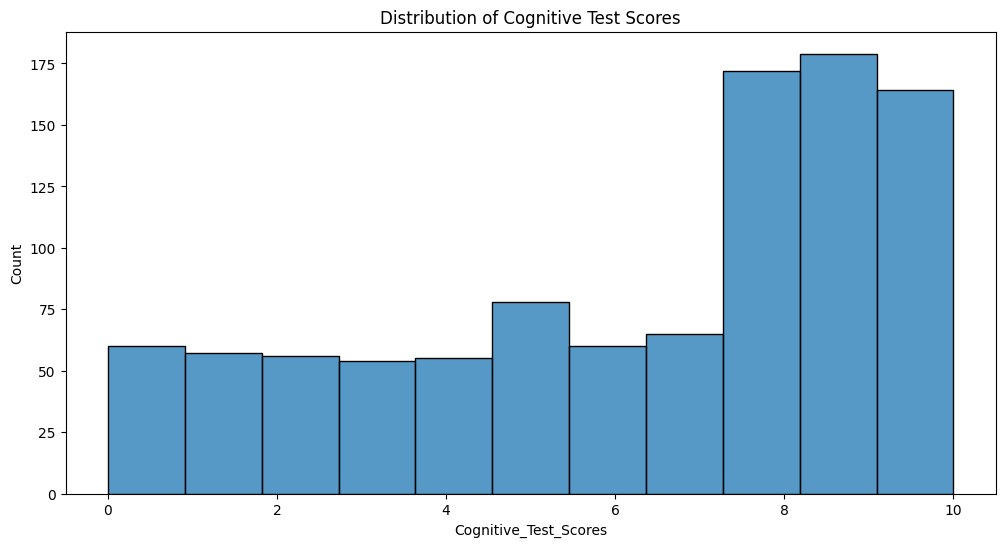

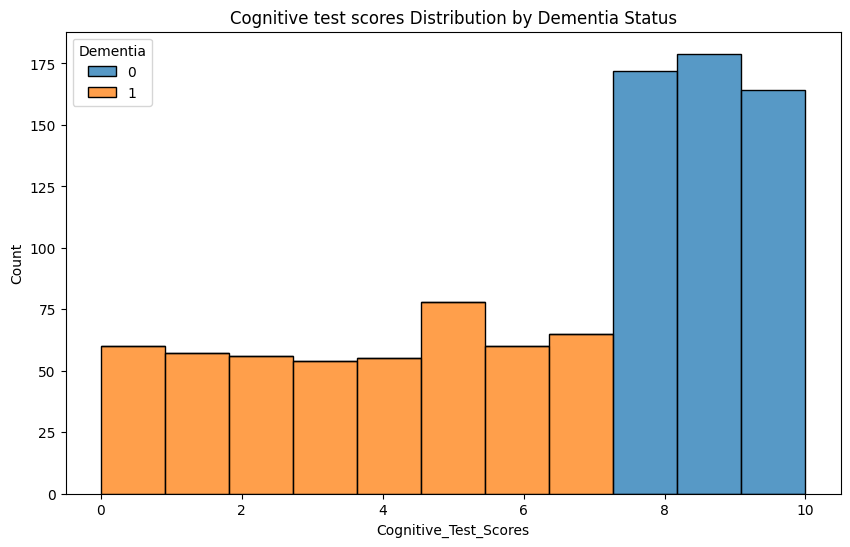

In [ ]:


plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Cognitive_Test_Scores')
plt.title('Distribution of Cognitive Test Scores')
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Cognitive_Test_Scores', hue='Dementia', multiple='stack')
plt.title('Cognitive test scores Distribution by Dementia Status')
plt.xlabel('Cognitive_Test_Scores')
plt.ylabel('Count')
plt.show()


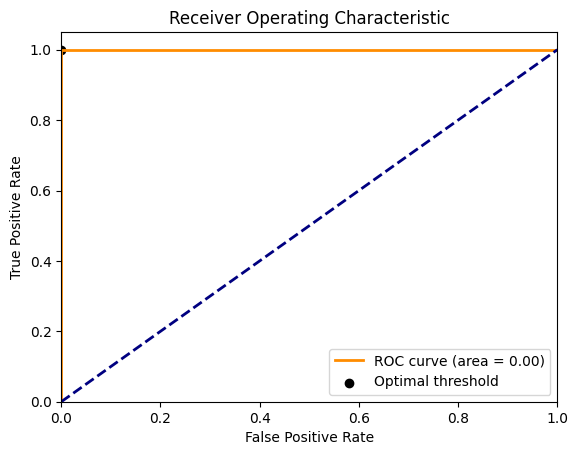

Optimal threshold for Cognitive Test Score:  8.0


In [ ]:

y_true = df['Dementia']
y_scores = df['Cognitive_Test_Scores']

fpr, tpr, thresholds = roc_curve(y_true, y_scores, pos_label=0)
roc_auc = roc_auc_score(y_true, y_scores)

# Find the optimal threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='black', label='Optimal threshold')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print("Optimal threshold for Cognitive Test Score: ", optimal_threshold)




---

**Analysing the relationship between Dosage_in_mg and Dementia:**

The histogram shows that most individuals without dementia are not on any dementia-related medication (0 mg).

All individuals with dementia are taking some dosage of medication.There are distinct dosage levels that these individuals are on, which could reflect different stages of dementia or different treatment protocols.



---



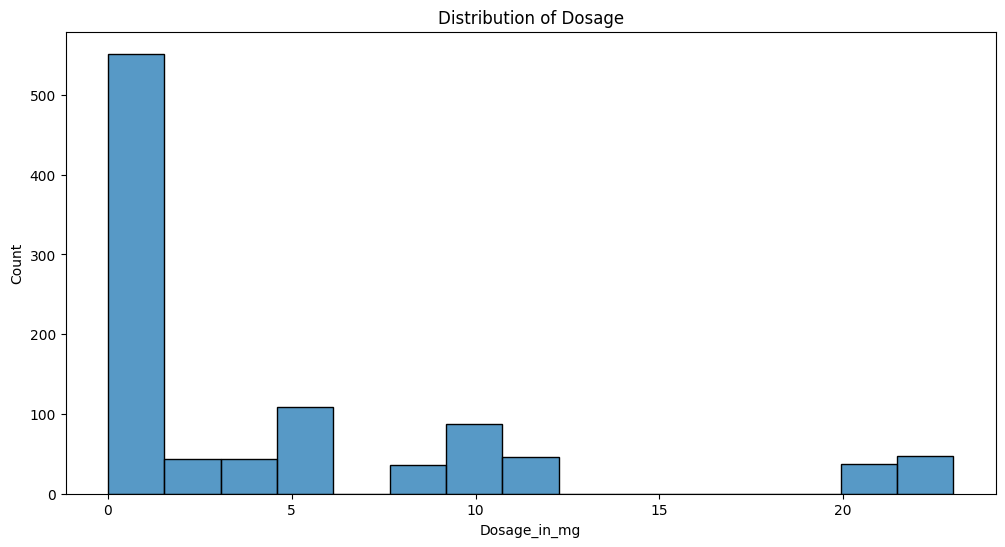

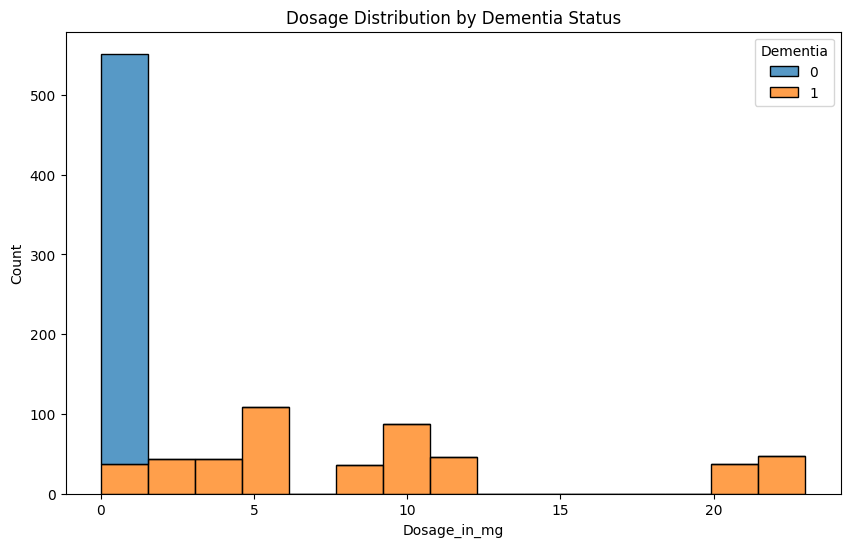

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Dosage_in_mg')
plt.title('Distribution of Dosage')
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Dosage_in_mg', hue='Dementia', multiple='stack')
plt.title('Dosage Distribution by Dementia Status')
plt.xlabel('Dosage_in_mg')
plt.ylabel('Count')
plt.show()



---
**Analysing the relationship between Dosage_in_mg and Cognitive_Test_Scores**:


The scatter plot indicates that patients with a cognitive test score below the optimal threshold of 8 have been prescribed medication. This suggests that only patients with dementia are receiving the medication.


---



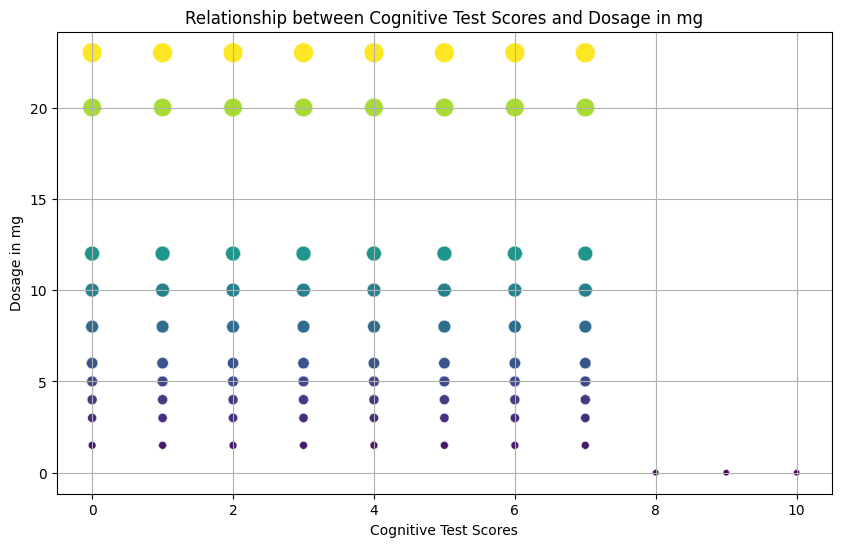

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Cognitive_Test_Scores',
    y='Dosage_in_mg',
    data=df,
    hue='Dosage_in_mg',
    palette='viridis',
    size='Dosage_in_mg',
    sizes=(20, 200),
    legend=False
)
plt.title('Relationship between Cognitive Test Scores and Dosage in mg')
plt.xlabel('Cognitive Test Scores')
plt.ylabel('Dosage in mg')
plt.grid(True)
plt.show()

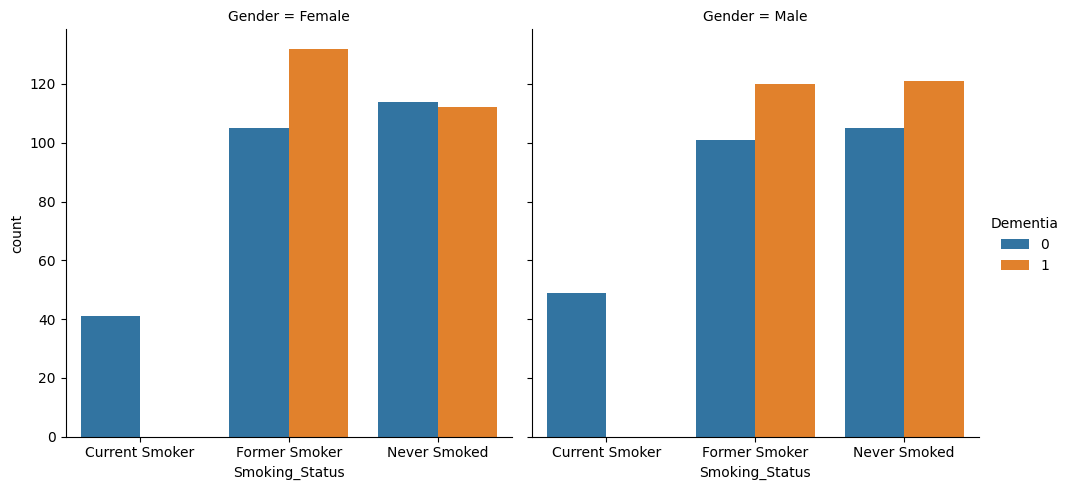

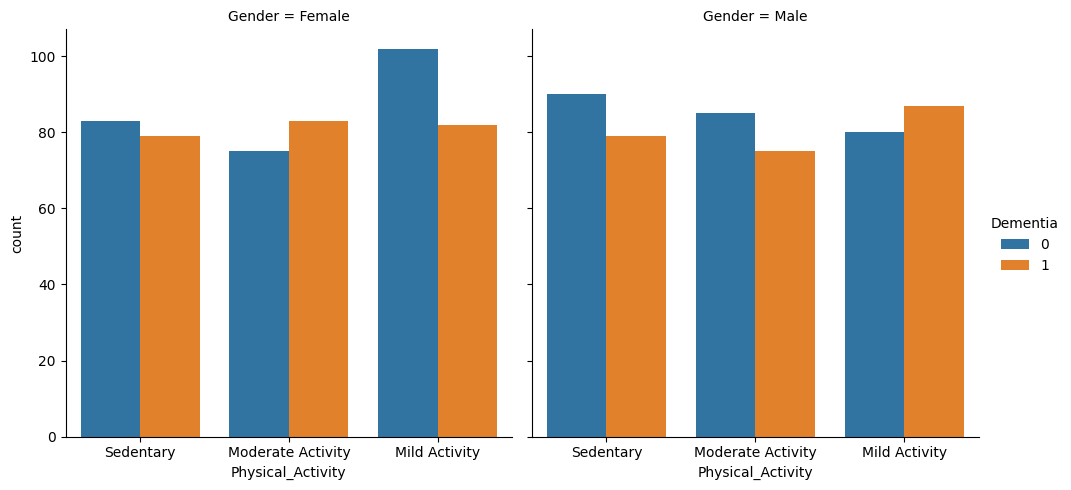

In [ ]:
sns.catplot(x='Smoking_Status', hue='Dementia', col='Gender', data=df, kind='count')
plt.show()

sns.catplot(x='Physical_Activity', hue='Dementia', col='Gender', data=df, kind='count')
plt.show()


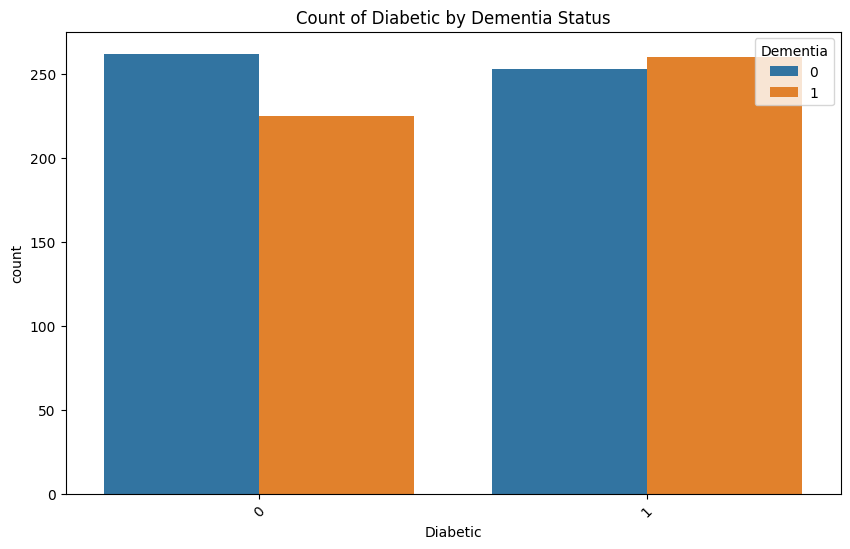

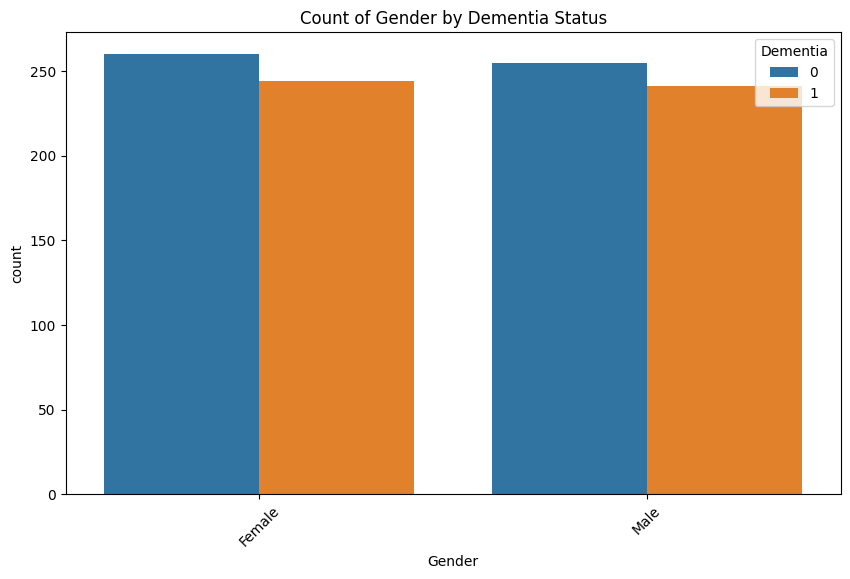

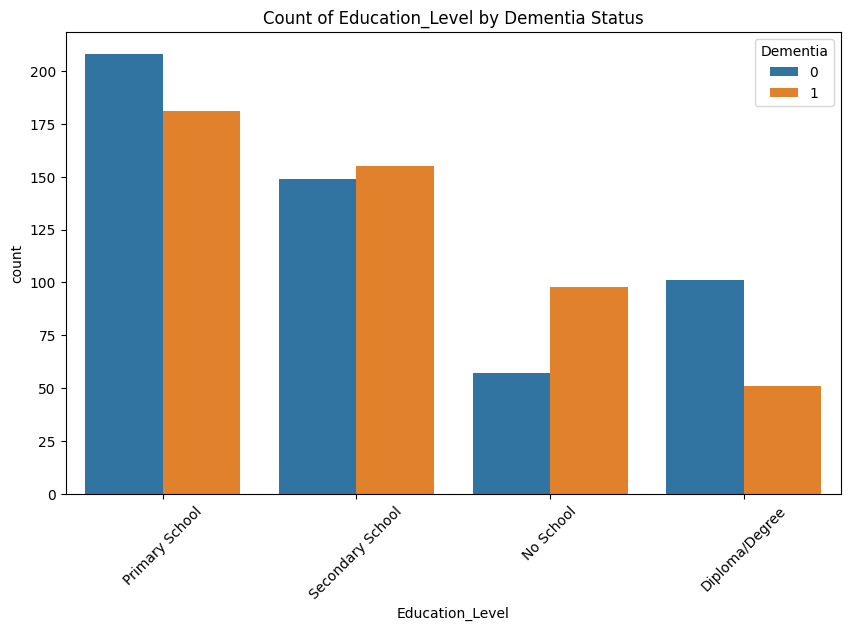

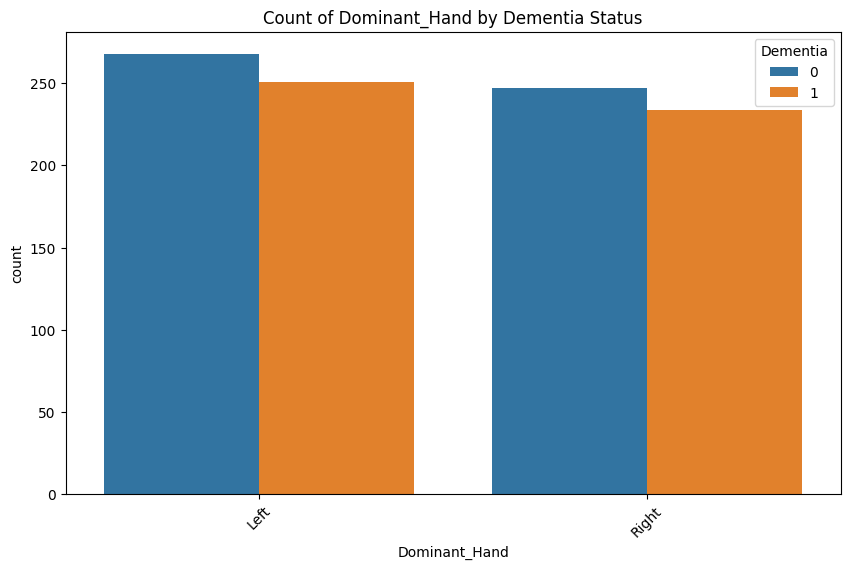

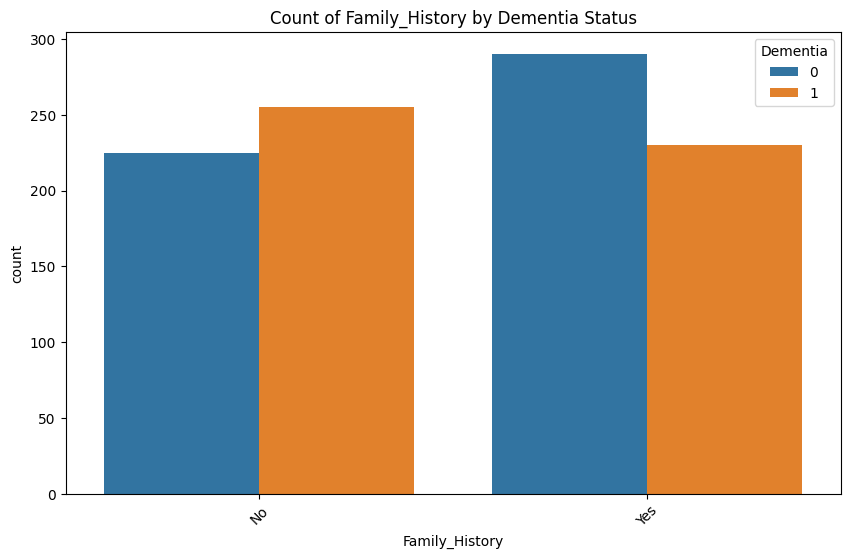

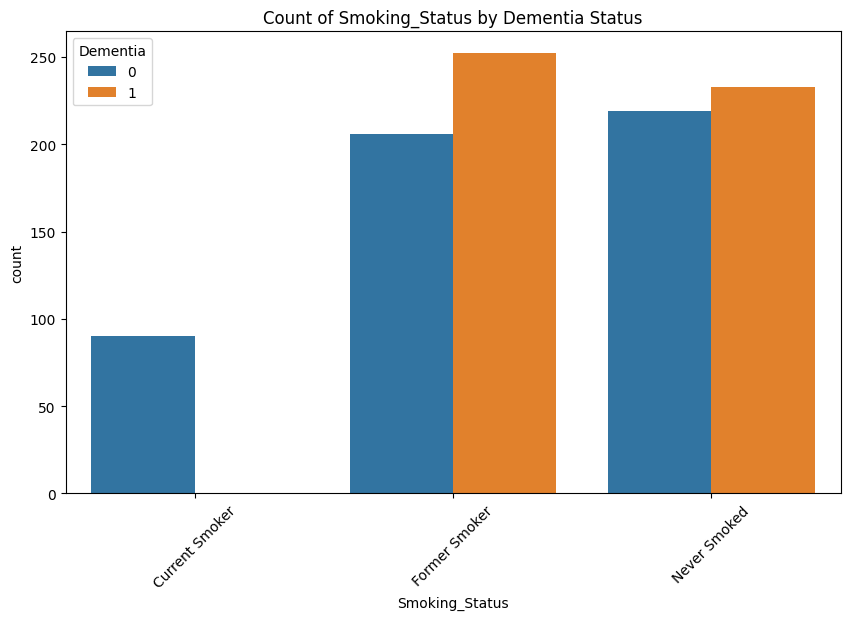

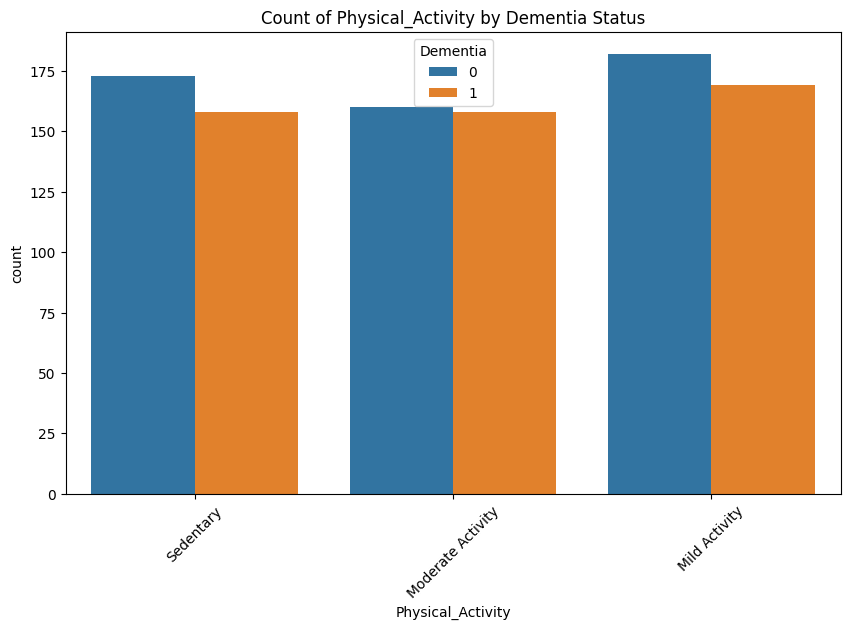

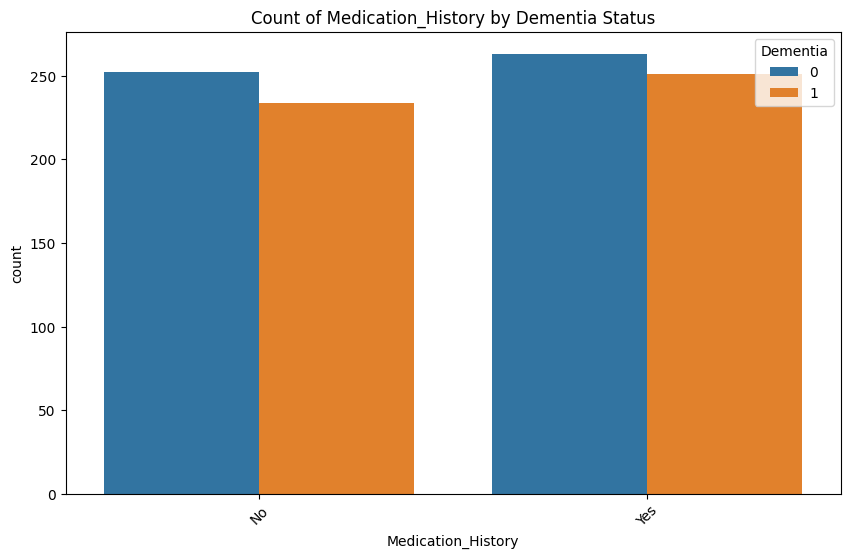

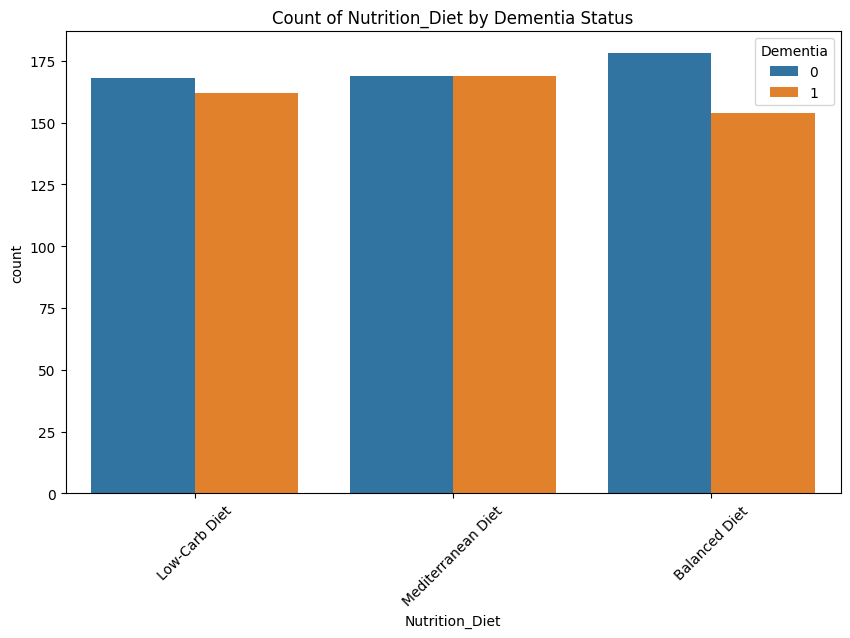

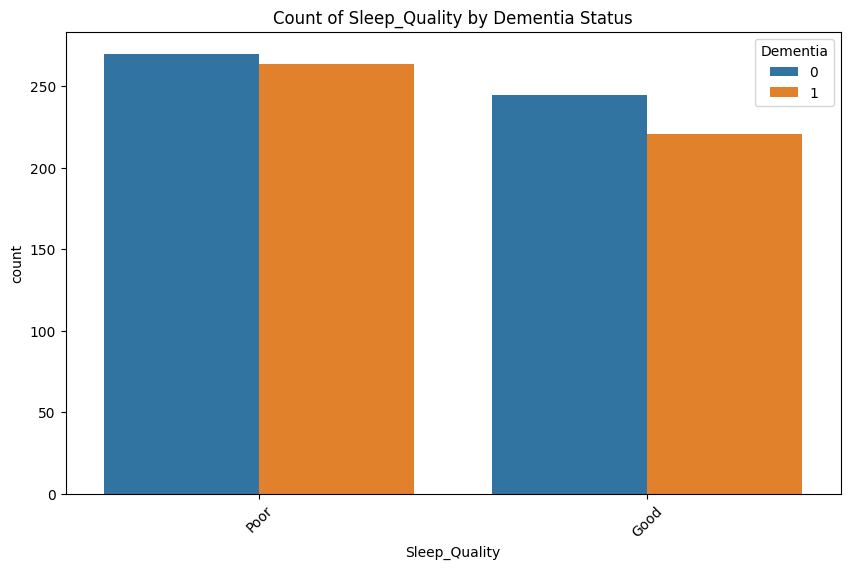

In [ ]:
categorical_cols = ['Diabetic', 'Gender', 'Education_Level', 'Dominant_Hand', 'Family_History', 'Smoking_Status', 'Physical_Activity', 'Medication_History', 'Nutrition_Diet', 'Sleep_Quality']

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='Dementia', data=df)
    plt.title(f'Count of {col} by Dementia Status')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as ss

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))


In [ ]:

categorical_cols = df.select_dtypes(include=['object', 'category']).columns

cramers_v_results = pd.DataFrame(index=categorical_cols, columns=['Cramér\'s V with Dementia'])


for col in categorical_cols:
    cramers_v_results.loc[col, 'Cramér\'s V with Dementia'] = cramers_v(df[col], df['Dementia'])

cramers_v_results['Cramér\'s V with Dementia'] = cramers_v_results['Cramér\'s V with Dementia'].astype(float)

print(cramers_v_results)


                           Cramér's V with Dementia
Prescription                               1.000000
Education_Level                            0.168554
Dominant_Hand                              0.000861
Gender                                     0.000000
Family_History                             0.086909
Smoking_Status                             0.306983
APOE_ε4                                    0.425121
Physical_Activity                          0.016555
Depression_Status                          0.584680
Medication_History                         0.004844
Nutrition_Diet                             0.030739
Sleep_Quality                              0.018090
Chronic_Health_Conditions                  0.061732


<ipython-input-59-5c6d615b8618>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cramers_v_results_sorted.index, y=cramers_v_results_sorted['Cramér\'s V with Dementia'], palette='coolwarm')


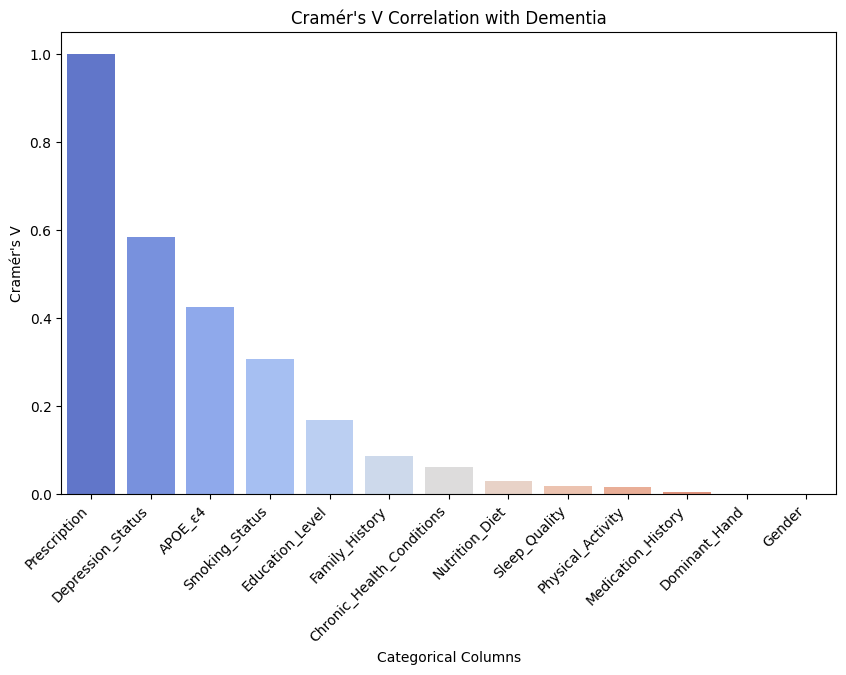

In [ ]:


# Sort the results for better visualization
cramers_v_results_sorted = cramers_v_results.sort_values(by='Cramér\'s V with Dementia', ascending=False)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=cramers_v_results_sorted.index, y=cramers_v_results_sorted['Cramér\'s V with Dementia'], palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.title("Cramér's V Correlation with Dementia")
plt.ylabel("Cramér's V")
plt.xlabel("Categorical Columns")
plt.show()


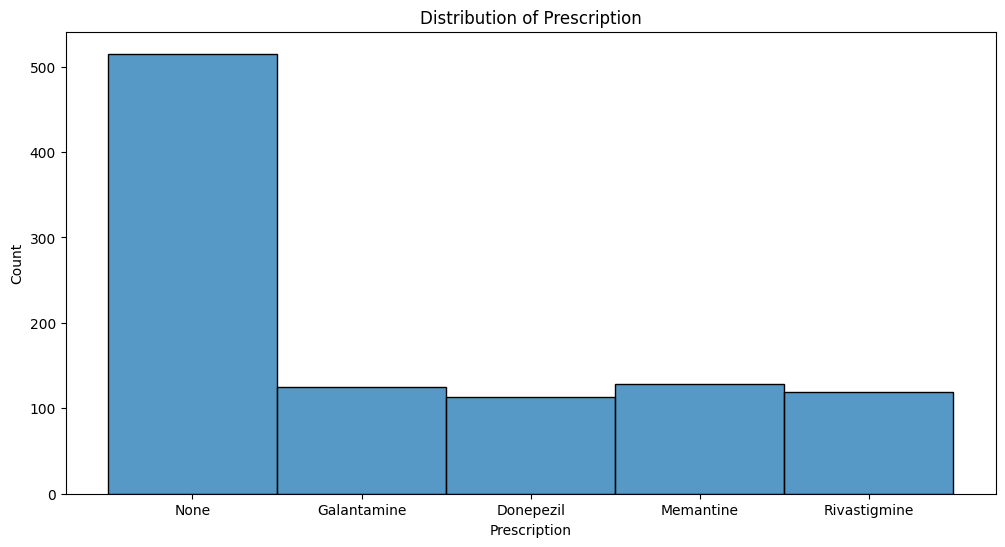

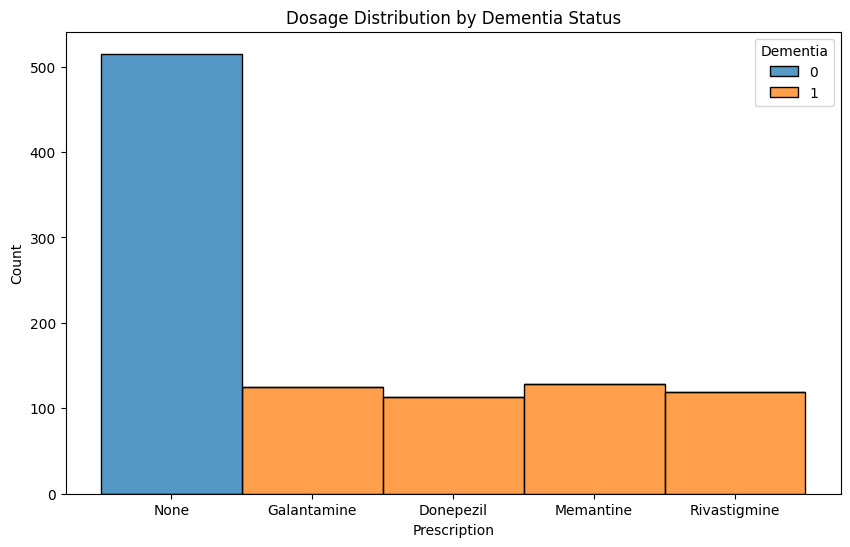

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Prescription')
plt.title('Distribution of Prescription')
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Prescription', hue='Dementia', multiple='stack')
plt.title('Dosage Distribution by Dementia Status')
plt.xlabel('Prescription')
plt.ylabel('Count')
plt.show()

# Data Preprocessing

In [ ]:
df

,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Prescription,Dosage_in_mg,Age,Education_Level,Dominant_Hand,Gender,Family_History,Smoking_Status,APOE_ε4,Physical_Activity,Depression_Status,Cognitive_Test_Scores,Medication_History,Nutrition_Diet,Sleep_Quality,Chronic_Health_Conditions,Dementia
0,1,0.084974,98,96.230743,36.224852,57.563978,36.421028,None,0.0,60,Primary School,Left,Female,No,Current Smoker,Negative,Sedentary,No,10,No,Low-Carb Diet,Poor,Diabetes,0
1,0,0.016973,78,93.032122,36.183874,56.832335,31.157633,Galantamine,12.0,61,Secondary School,Right,Male,No,Former Smoker,Positive,Moderate Activity,No,1,Yes,Low-Carb Diet,Poor,Heart Disease,1
2,0,0.009000,89,93.566504,37.326321,59.759066,37.640435,None,0.0,69,Primary School,Right,Male,Yes,Former Smoker,Negative,Moderate Activity,No,8,No,Mediterranean Diet,Poor,Heart Disease,0
3,0,0.086437,60,93.906510,37.030620,58.266471,50.673992,Donepezil,23.0,78,Secondary School,Left,Female,Yes,Never Smoked,Negative,Mild Activity,Yes,5,Yes,Balanced Diet,Poor,Hypertension,1
4,1,0.150747,67,97.508994,36.062121,67.705027,27.810601,Memantine,20.0,77,Secondary School,Right,Male,Yes,Never Smoked,Positive,Mild Activity,No,0,Yes,Low-Carb Diet,Good,Diabetes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0.081825,87,93.851963,36.495134,50.380106,42.318663,Donepezil,10.0,88,Diploma/Degree,Left,Male,Yes,Never Smoked,Positive,Mild Activity,No,5,No,Balanced Diet,Poor,Diabetes,1
996,1,0.145249,97,94.522391,36.270804,94.006484,52.812568,None,0.0,80,Primary School,Left,Female,No,Never Smoked,Negative,Moderate Activity,No,9,Yes,Low-Carb Diet,Poor,Diabetes,0
997,1,0.073692,65,98.578388,37.065703,80.088613,13.640229,None,0.0,67,Primary School,Right,Female,No,Never Smoked,Positive,Sedentary,No,8,Yes,Balanced Diet,Good,Diabetes,0
998,0,0.037347,71,91.298580,37.037202,95.322210,17.445715,Memantine,20.0,62,No School,Left,Male,Yes,Never Smoked,Positive,Sedentary,Yes,2,No,Low-Carb Diet,Good,None,1


In [ ]:
df.isna().sum()

,0
Diabetic,0
AlcoholLevel,0
HeartRate,0
BloodOxygenLevel,0
BodyTemperature,0
Weight,0
MRI_Delay,0
Prescription,0
Dosage_in_mg,0
Age,0


In [ ]:
# dropping these 2 columns because from the EDA we can see that only patients with demetia have prescription and medication dosage
df.drop(columns=['Prescription', 'Dosage_in_mg'], inplace=True)

In [ ]:
df.isna().sum()

,0
Diabetic,0
AlcoholLevel,0
HeartRate,0
BloodOxygenLevel,0
BodyTemperature,0
Weight,0
MRI_Delay,0
Age,0
Education_Level,0
Dominant_Hand,0


In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
print(categotical_cols)

Index(['Prescription', 'Education_Level', 'Dominant_Hand', 'Gender',
       'Family_History', 'Smoking_Status', 'APOE_ε4', 'Physical_Activity',
       'Depression_Status', 'Medication_History', 'Nutrition_Diet',
       'Sleep_Quality', 'Chronic_Health_Conditions'],
      dtype='object')


In [ ]:

df = pd.get_dummies(df, columns=categorical_cols)

# Convert all boolean columns to integers (0 and 1)
df = df.applymap(lambda x: int(x) if isinstance(x, bool) else x)

# View the modified dataframe
print(df.head())


   Diabetic  AlcoholLevel  HeartRate  BloodOxygenLevel  BodyTemperature  \
0         1      0.084974         98         96.230743        36.224852   
1         0      0.016973         78         93.032122        36.183874   
2         0      0.009000         89         93.566504        37.326321   
3         0      0.086437         60         93.906510        37.030620   
4         1      0.150747         67         97.508994        36.062121   

      Weight  MRI_Delay  Age  Cognitive_Test_Scores  Dementia  \
0  57.563978  36.421028   60                     10         0   
1  56.832335  31.157633   61                      1         1   
2  59.759066  37.640435   69                      8         0   
3  58.266471  50.673992   78                      5         1   
4  67.705027  27.810601   77                      0         1   

   Education_Level_Diploma/Degree  Education_Level_No School  \
0                               0                          0   
1                             

<ipython-input-66-791ecf21ae48>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: int(x) if isinstance(x, bool) else x)


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df.head()

,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Age,Cognitive_Test_Scores,Dementia,Education_Level_Diploma/Degree,Education_Level_No School,Education_Level_Primary School,Education_Level_Secondary School,Dominant_Hand_Left,Dominant_Hand_Right,Gender_Female,Gender_Male,Family_History_No,Family_History_Yes,Smoking_Status_Current Smoker,Smoking_Status_Former Smoker,Smoking_Status_Never Smoked,APOE_ε4_Negative,APOE_ε4_Positive,Physical_Activity_Mild Activity,Physical_Activity_Moderate Activity,Physical_Activity_Sedentary,Depression_Status_No,Depression_Status_Yes,Medication_History_No,Medication_History_Yes,Nutrition_Diet_Balanced Diet,Nutrition_Diet_Low-Carb Diet,Nutrition_Diet_Mediterranean Diet,Sleep_Quality_Good,Sleep_Quality_Poor,Chronic_Health_Conditions_Diabetes,Chronic_Health_Conditions_Heart Disease,Chronic_Health_Conditions_Hypertension,Chronic_Health_Conditions_None
0,1,0.084974,98,96.230743,36.224852,57.563978,36.421028,60,10,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,1,1,0,0,0
1,0,0.016973,78,93.032122,36.183874,56.832335,31.157633,61,1,1,0,0,0,1,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0
2,0,0.009000,89,93.566504,37.326321,59.759066,37.640435,69,8,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0
3,0,0.086437,60,93.906510,37.030620,58.266471,50.673992,78,5,1,0,0,0,1,1,0,1,0,0,1,0,0,1,1,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0
4,1,0.150747,67,97.508994,36.062121,67.705027,27.810601,77,0,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0


In [ ]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns


In [ ]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numeric columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [ ]:
df.head()

,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Age,Cognitive_Test_Scores,Dementia,Education_Level_Diploma/Degree,Education_Level_No School,Education_Level_Primary School,Education_Level_Secondary School,Dominant_Hand_Left,Dominant_Hand_Right,Gender_Female,Gender_Male,Family_History_No,Family_History_Yes,Smoking_Status_Current Smoker,Smoking_Status_Former Smoker,Smoking_Status_Never Smoked,APOE_ε4_Negative,APOE_ε4_Positive,Physical_Activity_Mild Activity,Physical_Activity_Moderate Activity,Physical_Activity_Sedentary,Depression_Status_No,Depression_Status_Yes,Medication_History_No,Medication_History_Yes,Nutrition_Diet_Balanced Diet,Nutrition_Diet_Low-Carb Diet,Nutrition_Diet_Mediterranean Diet,Sleep_Quality_Good,Sleep_Quality_Poor,Chronic_Health_Conditions_Diabetes,Chronic_Health_Conditions_Heart Disease,Chronic_Health_Conditions_Hypertension,Chronic_Health_Conditions_None
0,1.0,0.423960,0.950,0.622719,0.149022,0.150146,0.606826,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,0.083022,0.450,0.302491,0.121607,0.135488,0.518901,0.033333,0.1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.043050,0.725,0.355990,0.885938,0.194125,0.627196,0.300000,0.8,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,0.431298,0.000,0.390030,0.688106,0.164221,0.844919,0.600000,0.5,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.753731,0.175,0.750691,0.040150,0.353321,0.462990,0.566667,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
low_corr_cols = cramers_v_results[cramers_v_results['Cramér\'s V with Dementia'] < 0.1].index

In [ ]:
print(low_corr_cols)

Index(['Dominant_Hand', 'Gender', 'Family_History', 'Physical_Activity',
       'Medication_History', 'Nutrition_Diet', 'Sleep_Quality',
       'Chronic_Health_Conditions'],
      dtype='object')


In [ ]:


X = df.drop(columns=['Dementia'])
y = df['Dementia']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Calculate feature importances
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)


                                    Feature  Importance
8                     Cognitive_Test_Scores    0.521127
28                    Depression_Status_Yes    0.101727
27                     Depression_Status_No    0.095039
23                         APOE_ε4_Positive    0.048788
22                         APOE_ε4_Negative    0.034648
3                          BloodOxygenLevel    0.020507
19            Smoking_Status_Current Smoker    0.020006
1                              AlcoholLevel    0.016785
5                                    Weight    0.016741
4                           BodyTemperature    0.015936
6                                 MRI_Delay    0.015766
2                                 HeartRate    0.013389
7                                       Age    0.013239
10                Education_Level_No School    0.005569
9            Education_Level_Diploma/Degree    0.004285
21              Smoking_Status_Never Smoked    0.003757
20             Smoking_Status_Former Smoker    0

In [ ]:
# Set a threshold for importance
importance_threshold = 0.01

# Select features above the importance threshold
important_features = feature_importance_df[feature_importance_df['Importance'] > importance_threshold]['Feature']

# Print the features that are kept
print("Important features retained:", important_features.tolist())


Important features retained: ['Cognitive_Test_Scores', 'Depression_Status_Yes', 'Depression_Status_No', 'APOE_ε4_Positive', 'APOE_ε4_Negative', 'BloodOxygenLevel', 'Smoking_Status_Current Smoker', 'AlcoholLevel', 'Weight', 'BodyTemperature', 'MRI_Delay', 'HeartRate', 'Age']


In [ ]:
# Create a new dataset with only important features
X_train_important = X_train[important_features]
X_test_important = X_test[important_features]


# Final Pipeline

In [5]:
# Define a named function for ordinal replacement

def replace_ordinal_values(arr):
    replacement_dict = {'Unknown': 0, 'Sedentary': 1, 'Mild Activity': 2, 'Moderate Activity': 3}
    unique_values = np.unique(arr)
    replacement_dict_full = {val: replacement_dict.get(val, val) for val in unique_values}
    return np.vectorize(replacement_dict_full.get)(arr)

# Define FeatureEngineer class
class FeatureEngineer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        column_names = ['AlcoholLevel', 'HeartRate', 'BloodOxygenLevel', 'BodyTemperature',
                        'Weight', 'MRI_Delay', 'Age', 'Family_History', 'Smoking_Status',
                        'APOE_ε4', 'Physical_Activity', 'Depression_Status',
                        'Cognitive_Test_Scores', 'Chronic_Health_Conditions']

        column_indices = {name: idx for idx, name in enumerate(column_names)}
        num_rows = X.shape[0]
        new_features = np.zeros((num_rows, X.shape[1] + 8))

        new_features[:, :X.shape[1]] = X

        idx_Cognitive_Test_Scores = column_indices['Cognitive_Test_Scores']
        idx_AlcoholLevel = column_indices['AlcoholLevel']
        idx_MRI_Delay = column_indices['MRI_Delay']
        idx_BodyTemperature = column_indices['BodyTemperature']
        idx_Age = column_indices['Age']
        idx_Weight = column_indices['Weight']
        idx_Physical_Activity = column_indices['Physical_Activity']
        idx_Smoking_Status = column_indices['Smoking_Status']
        idx_BloodOxygenLevel = column_indices['BloodOxygenLevel']
        idx_Family_History = column_indices['Family_History']

        new_features[:, X.shape[1]] = X[:, idx_Cognitive_Test_Scores] ** 2
        new_features[:, X.shape[1] + 1] = X[:, idx_AlcoholLevel] ** 2
        new_features[:, X.shape[1] + 2] = np.sqrt(np.clip(X[:, idx_MRI_Delay], a_min=0, a_max=None))
        new_features[:, X.shape[1] + 3] = X[:, idx_BodyTemperature] / X[:, idx_Age]
        new_features[:, X.shape[1] + 4] = X[:, idx_BodyTemperature] / X[:, idx_Weight]
        new_features[:, X.shape[1] + 5] = X[:, idx_Physical_Activity] / X[:, idx_Age]
        new_features[:, X.shape[1] + 6] = X[:, idx_Smoking_Status] * X[:, idx_BloodOxygenLevel]
        new_features[:, X.shape[1] + 7] = X[:, idx_Family_History] * X[:, idx_Weight]

        new_features = new_features[:, X.shape[1]:]

        return new_features

In [6]:


# Define features and target variable
selected_columns = ['AlcoholLevel', 'HeartRate', 'BloodOxygenLevel',
                    'BodyTemperature', 'Weight', 'MRI_Delay', 'Age', 'Family_History',
                    'Smoking_Status', 'APOE_ε4', 'Physical_Activity', 'Depression_Status',
                    'Cognitive_Test_Scores', 'Chronic_Health_Conditions']

X = df[selected_columns]
y = df['Dementia']

# Split the data into training+validation (80%) and test sets (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Split the training+validation set into training (70%) and validation (30%) sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.375, stratify=y_train_val, random_state=42)

# Pipeline for categorical features
categorical_features = ['Family_History', 'Smoking_Status', 'APOE_ε4', 'Depression_Status', 'Chronic_Health_Conditions']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# Pipeline for numerical features
numerical_features = ['AlcoholLevel', 'HeartRate', 'BloodOxygenLevel', 'BodyTemperature', 'Weight', 'MRI_Delay', 'Age', 'Cognitive_Test_Scores']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    #('scaler', StandardScaler())
])

# Pipeline for ordinal features
ordinal_features = ['Physical_Activity']
ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('ordinal', FunctionTransformer(replace_ordinal_values))
])

# Preprocessor combining all transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
        ('ord', ordinal_transformer, ordinal_features)
    ])

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    'AdaBoost': AdaBoostClassifier(),
    'k-NN': KNeighborsClassifier()
}

# Initialize MLflow experiment
mlflow.set_experiment('Dementia Prediction Experiment')

best_model = None
best_score = 0

results = []
for name, clf in classifiers.items():
    mlflow.end_run()  # End any previous run
    with mlflow.start_run(run_name=name):
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('feature_engineer', FeatureEngineer()),
            ('scaler', MinMaxScaler()),
            ('classifier', clf)
        ])

        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_val)

        # Calculate metrics
        accuracy = accuracy_score(y_val, y_pred)
        precision = precision_score(y_val, y_pred, average='weighted')
        recall = recall_score(y_val, y_pred, average='weighted')
        f1 = f1_score(y_val, y_pred, average='weighted')

        # Log metrics to MLFlow
        mlflow.log_metric('accuracy', accuracy)
        mlflow.log_metric('precision', precision)
        mlflow.log_metric('recall', recall)
        mlflow.log_metric('f1_score', f1)

        # Log additional metadata
        mlflow.set_tag("model_name", name)
        mlflow.set_tag("stage", "test")

        # Log model
        mlflow.sklearn.log_model(pipeline, "model")

        # Append the results
        results.append({
            'Classifier': name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        })

        # Track the best model
        if accuracy > best_score:
            best_score = accuracy
            best_model = pipeline

# Save the best model to a pickle file
if best_model:
    with open('best_model.pkl', 'wb') as f:
        pickle.dump(best_model, f)



# Create DataFrame with results
results_df = pd.DataFrame(results)
results_df


2024/08/21 03:48:31 INFO mlflow.tracking.fluent: Experiment with name 'Dementia Prediction Experiment' does not exist. Creating a new experiment.
/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:32: UserWarning: Setuptools is replacing distutils. Support for replacing an already imported distutils is deprecated. In the future, this condition will fail. Register concerns at https://github.com/pypa/setuptools/issues/new?template=distutils-deprecation.yml
  warnings.warn(
2024/08/21 03:48:38 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/21 03:48:41 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/21 03:48:45 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the mode

,Classifier,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.953333,0.957199,0.953333,0.953158
1,Decision Tree,0.983333,0.983516,0.983333,0.983326
2,Random Forest,0.963333,0.964942,0.963333,0.963263
3,Gradient Boosting,0.986667,0.987002,0.986667,0.986658
4,XGBoost,0.976667,0.977173,0.976667,0.976647
5,AdaBoost,0.986667,0.986667,0.986667,0.986667
6,k-NN,0.900000,0.908387,0.900000,0.899209


# Logistic Regression Grid Search

In [26]:
# Define the classifier
classifier = LogisticRegression()
log_reg_results = []
log_reg_results_test = []
# Full pipeline including preprocessing, feature engineering, and classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_engineer', FeatureEngineer()),
    ('scaler', MinMaxScaler()),
    ('classifier', classifier)
])

# Parameter grid for GridSearchCV
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__solver': ['lbfgs', 'liblinear', 'saga']
}

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score}")

# Evaluate on the validation set
y_pred = grid_search.predict(X_val)

# Calculate metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')


# Evaluate on the test set
log_reg_y_pred = grid_search.predict(X_test)

# Calculate metrics
log_reg_accuracy = accuracy_score(y_test, log_reg_y_pred)
log_reg_precision = precision_score(y_test, log_reg_y_pred, average='weighted')
log_reg_recall = recall_score(y_test, log_reg_y_pred, average='weighted')
log_reg_f1 = f1_score(y_test, log_reg_y_pred, average='weighted')


# Log the best model to MLflow
mlflow.end_run()  # End any previous run
with mlflow.start_run(run_name="Logistic Regression with Grid Search"):
    mlflow.log_params(best_params)
    mlflow.log_metric('accuracy', accuracy)
    mlflow.log_metric('precision', precision)
    mlflow.log_metric('recall', recall)
    mlflow.log_metric('f1_score', f1)
    mlflow.sklearn.log_model(grid_search.best_estimator_, "best_model")

log_reg_results.append({
  'Classifier': "Logistic Regression",
  'Best Params': best_params,
  'Accuracy': accuracy,
  'Precision': precision,
  'Recall': recall,
  'F1 Score': f1
})

log_reg_results_test.append({
  'Classifier': "Logistic Regression",
  'Best Params': best_params,
  'Accuracy': log_reg_accuracy,
  'Precision': log_reg_precision,
  'Recall': log_reg_recall,
  'F1 Score': log_reg_f1
})

results_df = pd.DataFrame(log_reg_results)
results_test_df = pd.DataFrame(log_reg_results_test)

results_df



Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'classifier__C': 100, 'classifier__solver': 'lbfgs'}
Best Cross-Validation Accuracy: 0.982


2024/08/21 04:33:00 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


,Classifier,Best Params,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,"{'classifier__C': 100, 'classifier__solver': 'lbfgs'}",0.976667,0.977675,0.976667,0.976636


In [27]:
results_test_df

,Classifier,Best Params,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,"{'classifier__C': 100, 'classifier__solver': 'lbfgs'}",0.99,0.99019,0.99,0.989996


In [ ]:
# Save the best model to a pickle file
with open('log_reg_best_model_new.pkl', 'wb') as f:
    pickle.dump(grid_search.best_estimator_, f)

#KNN Grid serach hyperparam tuning

In [29]:
# Define the classifier
knn_classifier = KNeighborsClassifier()
knn_results = []
knn_results_test = []
# Full pipeline including preprocessing, feature engineering, and classifier
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_engineer', FeatureEngineer()),
    ('scaler', MinMaxScaler()),
    ('classifier', knn_classifier)
])

# Parameter grid for GridSearchCV
knn_param_grid = {
    'classifier__n_neighbors': [3, 5, 7, 9],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Grid search with 5-fold cross-validation
knn_grid_search = GridSearchCV(knn_pipeline, knn_param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
knn_grid_search.fit(X_train, y_train)

# Best parameters and score
knn_best_params = knn_grid_search.best_params_
knn_best_score = knn_grid_search.best_score_

print(f"Best Parameters for KNN: {knn_best_params}")
print(f"Best Cross-Validation Accuracy for KNN: {knn_best_score}")

# Evaluate on the validation set
knn_y_pred = knn_grid_search.predict(X_val)

# Calculate metrics
knn_accuracy = accuracy_score(y_val, knn_y_pred)
knn_precision = precision_score(y_val, knn_y_pred, average='weighted')
knn_recall = recall_score(y_val, knn_y_pred, average='weighted')
knn_f1 = f1_score(y_val, knn_y_pred, average='weighted')

# Evaluate on the test set
knn_y_pred_test = knn_grid_search.predict(X_test)

# Calculate metrics
knn_accuracy_test = accuracy_score(y_test, knn_y_pred_test)
knn_precision_test = precision_score(y_test, knn_y_pred_test, average='weighted')
knn_recall_test = recall_score(y_test, knn_y_pred_test, average='weighted')
knn_f1_test = f1_score(y_test, knn_y_pred_test, average='weighted')


# Log the best model to MLflow
mlflow.end_run()  # End any previous run
with mlflow.start_run(run_name="KNN with Grid Search"):
    mlflow.log_params(knn_best_params)
    mlflow.log_metric('accuracy', knn_accuracy)
    mlflow.log_metric('precision', knn_precision)
    mlflow.log_metric('recall', knn_recall)
    mlflow.log_metric('f1_score', knn_f1)
    mlflow.sklearn.log_model(knn_grid_search.best_estimator_, "best_model")

# Create a DataFrame for KNN results
knn_results_df = pd.DataFrame([{
    'Classifier': "K-Nearest Neighbors",
    'Best Params': knn_best_params,
    'Accuracy': knn_accuracy,
    'Precision': knn_precision,
    'Recall': knn_recall,
    'F1 Score': knn_f1
}])

knn_results_df_test = pd.DataFrame([{
    'Classifier': "K-Nearest Neighbors",
    'Best Params': knn_best_params,
    'Accuracy': knn_accuracy_test,
    'Precision': knn_precision_test,
    'Recall': knn_recall_test,
    'F1 Score': knn_f1_test
}])

# Combine Logistic Regression and KNN results using pd.concat
results_df = pd.concat([results_df, knn_results_df], ignore_index=True)
results_test_df = pd.concat([results_test_df, knn_results_df_test], ignore_index=True)

# Display the results DataFrame
results_df


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters for KNN: {'classifier__algorithm': 'auto', 'classifier__n_neighbors': 3, 'classifier__weights': 'uniform'}
Best Cross-Validation Accuracy for KNN: 0.9179999999999999


2024/08/21 04:41:05 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


,Classifier,Best Params,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,"{'classifier__C': 100, 'classifier__solver': 'lbfgs'}",0.976667,0.977675,0.976667,0.976636
1,K-Nearest Neighbors,"{'classifier__algorithm': 'auto', 'classifier__n_neighbors': 3, 'classifier__weights': 'uniform'}",0.880000,0.881437,0.880000,0.879732


In [30]:
results_test_df

,Classifier,Best Params,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,"{'classifier__C': 100, 'classifier__solver': 'lbfgs'}",0.99,0.990190,0.99,0.989996
1,K-Nearest Neighbors,"{'classifier__algorithm': 'auto', 'classifier__n_neighbors': 3, 'classifier__weights': 'uniform'}",0.87,0.876906,0.87,0.869081


# Decision Tree Grid search

In [31]:
# Define the classifier
dt_classifier = DecisionTreeClassifier()
dt_results = []

# Full pipeline including preprocessing, feature engineering, and classifier
dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_engineer', FeatureEngineer()),
    ('scaler', MinMaxScaler()),
    ('classifier', dt_classifier)
])

# Parameter grid for GridSearchCV
dt_param_grid = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10]
}

# Grid search with 5-fold cross-validation
dt_grid_search = GridSearchCV(dt_pipeline, dt_param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
dt_grid_search.fit(X_train, y_train)

# Best parameters and score
dt_best_params = dt_grid_search.best_params_
dt_best_score = dt_grid_search.best_score_

print(f"Best Parameters for Decision Tree: {dt_best_params}")
print(f"Best Cross-Validation Accuracy for Decision Tree: {dt_best_score}")

# Evaluate on the validation set
dt_y_pred = dt_grid_search.predict(X_val)

# Calculate metrics
dt_accuracy = accuracy_score(y_val, dt_y_pred)
dt_precision = precision_score(y_val, dt_y_pred, average='weighted')
dt_recall = recall_score(y_val, dt_y_pred, average='weighted')
dt_f1 = f1_score(y_val, dt_y_pred, average='weighted')

# Evaluate on the test set
dt_y_pred_test = dt_grid_search.predict(X_test)

# Calculate metrics
dt_accuracy_test = accuracy_score(y_test, dt_y_pred_test)
dt_precision_test = precision_score(y_test, dt_y_pred_test, average='weighted')
dt_recall_test = recall_score(y_test, dt_y_pred_test, average='weighted')
dt_f1_test = f1_score(y_test, dt_y_pred_test, average='weighted')

# Log the best model to MLflow
mlflow.end_run()  # End any previous run
with mlflow.start_run(run_name="Decision Tree with Grid Search"):
    mlflow.log_params(dt_best_params)
    mlflow.log_metric('accuracy', dt_accuracy)
    mlflow.log_metric('precision', dt_precision)
    mlflow.log_metric('recall', dt_recall)
    mlflow.log_metric('f1_score', dt_f1)
    mlflow.sklearn.log_model(dt_grid_search.best_estimator_, "best_model")

# Append Decision Tree results to the DataFrame
dt_results_df = pd.DataFrame([{
    'Classifier': "Decision Tree",
    'Best Params': dt_best_params,
    'Accuracy': dt_accuracy,
    'Precision': dt_precision,
    'Recall': dt_recall,
    'F1 Score': dt_f1
}])

dt_results_df_test = pd.DataFrame([{
    'Classifier': "Decision Tree",
    'Best Params': dt_best_params,
    'Accuracy': dt_accuracy_test,
    'Precision': dt_precision_test,
    'Recall': dt_recall_test,
    'F1 Score': dt_f1_test
}])

# Combine results
results_df = pd.concat([results_df, dt_results_df], ignore_index=True)
results_test_df = pd.concat([results_test_df, dt_results_df_test], ignore_index=True)
results_df

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters for Decision Tree: {'classifier__criterion': 'gini', 'classifier__max_depth': None, 'classifier__min_samples_split': 5}
Best Cross-Validation Accuracy for Decision Tree: 0.982


2024/08/21 04:42:32 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


,Classifier,Best Params,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,"{'classifier__C': 100, 'classifier__solver': 'lbfgs'}",0.976667,0.977675,0.976667,0.976636
1,K-Nearest Neighbors,"{'classifier__algorithm': 'auto', 'classifier__n_neighbors': 3, 'classifier__weights': 'uniform'}",0.880000,0.881437,0.880000,0.879732
2,Decision Tree,"{'classifier__criterion': 'gini', 'classifier__max_depth': None, 'classifier__min_samples_split': 5}",0.983333,0.983516,0.983333,0.983326


In [32]:
results_test_df

,Classifier,Best Params,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,"{'classifier__C': 100, 'classifier__solver': 'lbfgs'}",0.990,0.990190,0.990,0.989996
1,K-Nearest Neighbors,"{'classifier__algorithm': 'auto', 'classifier__n_neighbors': 3, 'classifier__weights': 'uniform'}",0.870,0.876906,0.870,0.869081
2,Decision Tree,"{'classifier__criterion': 'gini', 'classifier__max_depth': None, 'classifier__min_samples_split': 5}",0.975,0.975040,0.975,0.974996


# XG Boost with grid search

In [33]:
# Define the classifier
xgb_classifier = XGBClassifier(eval_metric='logloss')
xgb_results = []

# Full pipeline including preprocessing, feature engineering, and classifier
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_engineer', FeatureEngineer()),
    ('scaler', MinMaxScaler()),
    ('classifier', xgb_classifier)
])

# Parameter grid for GridSearchCV
xgb_param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7],
    'classifier__subsample': [0.7, 0.8, 0.9]
}

# Grid search with 5-fold cross-validation
xgb_grid_search = GridSearchCV(xgb_pipeline, xgb_param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
xgb_grid_search.fit(X_train, y_train)

# Best parameters and score
xgb_best_params = xgb_grid_search.best_params_
xgb_best_score = xgb_grid_search.best_score_

print(f"Best Parameters for XGBoost: {xgb_best_params}")
print(f"Best Cross-Validation Accuracy for XGBoost: {xgb_best_score}")

# Evaluate on the validation set
xgb_y_pred = xgb_grid_search.predict(X_val)

# Calculate metrics
xgb_accuracy = accuracy_score(y_val, xgb_y_pred)
xgb_precision = precision_score(y_val, xgb_y_pred, average='weighted')
xgb_recall = recall_score(y_val, xgb_y_pred, average='weighted')
xgb_f1 = f1_score(y_val, xgb_y_pred, average='weighted')

# Evaluate on the test set
xgb_y_pred_test = xgb_grid_search.predict(X_test)

# Calculate metrics
xgb_accuracy_test = accuracy_score(y_test, xgb_y_pred_test)
xgb_precision_test = precision_score(y_test, xgb_y_pred_test, average='weighted')
xgb_recall_test = recall_score(y_test, xgb_y_pred_test, average='weighted')
xgb_f1_test = f1_score(y_test, xgb_y_pred_test, average='weighted')

# Log the best model to MLflow
mlflow.end_run()  # End any previous run
with mlflow.start_run(run_name="XGBoost with Grid Search"):
    mlflow.log_params(xgb_best_params)
    mlflow.log_metric('accuracy', xgb_accuracy)
    mlflow.log_metric('precision', xgb_precision)
    mlflow.log_metric('recall', xgb_recall)
    mlflow.log_metric('f1_score', xgb_f1)
    mlflow.sklearn.log_model(xgb_grid_search.best_estimator_, "best_model")

# Append XGBoost results to the DataFrame
xgb_results_df = pd.DataFrame([{
    'Classifier': "XGBoost",
    'Best Params': xgb_best_params,
    'Accuracy': xgb_accuracy,
    'Precision': xgb_precision,
    'Recall': xgb_recall,
    'F1 Score': xgb_f1
}])

xgb_results_df_test = pd.DataFrame([{
    'Classifier': "XGBoost",
    'Best Params': xgb_best_params,
    'Accuracy': xgb_accuracy_test,
    'Precision': xgb_precision_test,
    'Recall': xgb_recall_test,
    'F1 Score': xgb_f1_test
}])

# Combine results
results_df = pd.concat([results_df, xgb_results_df], ignore_index=True)
results_test_df = pd.concat([results_test_df, xgb_results_df_test], ignore_index=True)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters for XGBoost: {'classifier__learning_rate': 0.2, 'classifier__max_depth': 3, 'classifier__n_estimators': 200, 'classifier__subsample': 0.8}
Best Cross-Validation Accuracy for XGBoost: 0.9879999999999999


2024/08/21 04:45:01 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


In [34]:
results_df

,Classifier,Best Params,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,"{'classifier__C': 100, 'classifier__solver': 'lbfgs'}",0.976667,0.977675,0.976667,0.976636
1,K-Nearest Neighbors,"{'classifier__algorithm': 'auto', 'classifier__n_neighbors': 3, 'classifier__weights': 'uniform'}",0.880000,0.881437,0.880000,0.879732
2,Decision Tree,"{'classifier__criterion': 'gini', 'classifier__max_depth': None, 'classifier__min_samples_split': 5}",0.983333,0.983516,0.983333,0.983326
3,XGBoost,"{'classifier__learning_rate': 0.2, 'classifier__max_depth': 3, 'classifier__n_estimators': 200, 'classifier__subsample': 0.8}",0.976667,0.977173,0.976667,0.976647


In [35]:
results_test_df

,Classifier,Best Params,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,"{'classifier__C': 100, 'classifier__solver': 'lbfgs'}",0.990,0.990190,0.990,0.989996
1,K-Nearest Neighbors,"{'classifier__algorithm': 'auto', 'classifier__n_neighbors': 3, 'classifier__weights': 'uniform'}",0.870,0.876906,0.870,0.869081
2,Decision Tree,"{'classifier__criterion': 'gini', 'classifier__max_depth': None, 'classifier__min_samples_split': 5}",0.975,0.975040,0.975,0.974996
3,XGBoost,"{'classifier__learning_rate': 0.2, 'classifier__max_depth': 3, 'classifier__n_estimators': 200, 'classifier__subsample': 0.8}",0.990,0.990190,0.990,0.989996


#ADA boost grid search

In [36]:
# Define the classifier
ada_classifier = AdaBoostClassifier()
ada_results = []

# Full pipeline including preprocessing, feature engineering, and classifier
ada_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_engineer', FeatureEngineer()),
    ('scaler', MinMaxScaler()),
    ('classifier', ada_classifier)
])

# Parameter grid for GridSearchCV
ada_param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 0.5, 1.0]
}

# Grid search with 5-fold cross-validation
ada_grid_search = GridSearchCV(ada_pipeline, ada_param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
ada_grid_search.fit(X_train, y_train)

# Best parameters and score
ada_best_params = ada_grid_search.best_params_
ada_best_score = ada_grid_search.best_score_

print(f"Best Parameters for AdaBoost: {ada_best_params}")
print(f"Best Cross-Validation Accuracy for AdaBoost: {ada_best_score}")

# Evaluate on the validation set
ada_y_pred = ada_grid_search.predict(X_val)

# Calculate metrics
ada_accuracy = accuracy_score(y_val, ada_y_pred)
ada_precision = precision_score(y_val, ada_y_pred, average='weighted')
ada_recall = recall_score(y_val, ada_y_pred, average='weighted')
ada_f1 = f1_score(y_val, ada_y_pred, average='weighted')

# Evaluate on the test set
ada_y_pred_test = ada_grid_search.predict(X_test)

# Calculate metrics
ada_accuracy_test = accuracy_score(y_test, ada_y_pred_test)
ada_precision_test = precision_score(y_test, ada_y_pred_test, average='weighted')
ada_recall_test = recall_score(y_test, ada_y_pred_test, average='weighted')
ada_f1_test = f1_score(y_test, ada_y_pred_test, average='weighted')

# Log the best model to MLflow
mlflow.end_run()  # End any previous run
with mlflow.start_run(run_name="AdaBoost with Grid Search"):
    mlflow.log_params(ada_best_params)
    mlflow.log_metric('accuracy', ada_accuracy)
    mlflow.log_metric('precision', ada_precision)
    mlflow.log_metric('recall', ada_recall)
    mlflow.log_metric('f1_score', ada_f1)
    mlflow.sklearn.log_model(ada_grid_search.best_estimator_, "best_model")

# Append AdaBoost results to the DataFrame
ada_results_df = pd.DataFrame([{
    'Classifier': "AdaBoost",
    'Best Params': ada_best_params,
    'Accuracy': ada_accuracy,
    'Precision': ada_precision,
    'Recall': ada_recall,
    'F1 Score': ada_f1
}])

# Append AdaBoost results to the DataFrame
ada_results_df_test = pd.DataFrame([{
    'Classifier': "AdaBoost",
    'Best Params': ada_best_params,
    'Accuracy': ada_accuracy_test,
    'Precision': ada_precision_test,
    'Recall': ada_recall_test,
    'F1 Score': ada_f1_test
}])

# Combine results
results_df = pd.concat([results_df, ada_results_df], ignore_index=True)
results_test_df = pd.concat([results_test_df, ada_results_df_test], ignore_index=True)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters for AdaBoost: {'classifier__learning_rate': 0.5, 'classifier__n_estimators': 50}
Best Cross-Validation Accuracy for AdaBoost: 0.986


2024/08/21 04:48:07 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


In [37]:
results_df

,Classifier,Best Params,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,"{'classifier__C': 100, 'classifier__solver': 'lbfgs'}",0.976667,0.977675,0.976667,0.976636
1,K-Nearest Neighbors,"{'classifier__algorithm': 'auto', 'classifier__n_neighbors': 3, 'classifier__weights': 'uniform'}",0.880000,0.881437,0.880000,0.879732
2,Decision Tree,"{'classifier__criterion': 'gini', 'classifier__max_depth': None, 'classifier__min_samples_split': 5}",0.983333,0.983516,0.983333,0.983326
3,XGBoost,"{'classifier__learning_rate': 0.2, 'classifier__max_depth': 3, 'classifier__n_estimators': 200, 'classifier__subsample': 0.8}",0.976667,0.977173,0.976667,0.976647
4,AdaBoost,"{'classifier__learning_rate': 0.5, 'classifier__n_estimators': 50}",0.983333,0.983854,0.983333,0.983319


In [42]:
results_test_df

,Classifier,Best Params,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,"{'classifier__C': 100, 'classifier__solver': 'lbfgs'}",0.976667,0.977675,0.976667,0.976636
1,K-Nearest Neighbors,"{'classifier__algorithm': 'auto', 'classifier__n_neighbors': 3, 'classifier__weights': 'uniform'}",0.880000,0.881437,0.880000,0.879732
2,Decision Tree,"{'classifier__criterion': 'gini', 'classifier__max_depth': None, 'classifier__min_samples_split': 5}",0.983333,0.983516,0.983333,0.983326
3,AdaBoost,"{'classifier__learning_rate': 0.5, 'classifier__n_estimators': 50}",0.985000,0.985425,0.985000,0.984990


In [24]:
pd.set_option('display.max_colwidth', None)

In [25]:
results_df2

,Classifier,Best Params,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,"{'classifier__C': 100, 'classifier__solver': 'lbfgs'}",0.976667,0.977675,0.976667,0.976636
1,K-Nearest Neighbors,"{'classifier__algorithm': 'auto', 'classifier__n_neighbors': 3, 'classifier__weights': 'uniform'}",0.880000,0.881437,0.880000,0.879732
2,Decision Tree,"{'classifier__criterion': 'gini', 'classifier__max_depth': None, 'classifier__min_samples_split': 2}",0.983333,0.983516,0.983333,0.983326
3,Decision Tree,"{'classifier__criterion': 'gini', 'classifier__max_depth': None, 'classifier__min_samples_split': 5}",0.983333,0.983516,0.983333,0.983326
4,XGBoost,"{'classifier__learning_rate': 0.2, 'classifier__max_depth': 3, 'classifier__n_estimators': 200, 'classifier__subsample': 0.8}",0.976667,0.977173,0.976667,0.976647
5,AdaBoost,"{'classifier__learning_rate': 0.5, 'classifier__n_estimators': 50}",0.983333,0.983854,0.983333,0.983319


In [23]:
best_adaboost_model = ada_grid_search.best_estimator_

# Save the best AdaBoost model to a pickle file
with open('best_adaboost_model.pkl', 'wb') as file:
    pickle.dump(best_adaboost_model, file)

In [ ]:
pip install pyngrok

In [ ]:
from pyngrok import ngrok

# Set your ngrok auth token
ngrok.set_auth_token("2klTGi7Aq5hUz3A5rTVgnyBDLg9_5e4W5dBoPq5mMDLZ7ntKN")

# Start MLFlow UI
get_ipython().system_raw("mlflow ui --port 5000 &")

# Create a tunnel to make it accessible
public_url = ngrok.connect(5000)
print(public_url)


NgrokTunnel: "https://7fd7-34-23-134-225.ngrok-free.app" -> "http://localhost:5000"


In [ ]:
experiment = mlflow.get_experiment_by_name('Dementia Prediction Experiment')
# Retrieve all runs in the experiment and sort by the desired test metric (e.g., test_f1_score)
runs = mlflow.search_runs(experiment_ids=[experiment.experiment_id])

# Sort runs by F1 score on the test set in descending order
best_run = runs.sort_values(by="metrics.f1_score", ascending=False).iloc[0]

# Extract the best run_id and model name
best_run_id = best_run["run_id"]
best_model_name = best_run["tags.model_name"]  # Access tags using dictionary-style access

print(f"The best model based on test F1 score is: {best_model_name}")
print(f"Run ID: {best_run_id}")
print(f"Test F1 Score: {best_run['metrics.f1_score']}")

The best model based on test F1 score is: None
Run ID: 88d8ce0a76ad442787ef575242f46b60
Test F1 Score: 0.7734526734526735


In [ ]:
model_uri = f"runs:/{best_run_id}/model"

In [ ]:
print(model_uri)

runs:/88d8ce0a76ad442787ef575242f46b60/model
